In [ ]:
## Vector DatabaseEGH|s
## Faiss // Chroma DB

# FAISS (Vector Store)- Facebook basesd Vector DB - Facebook based AI Similarity search
# It is an open source library, developed by Facebook AI researchers well designed for
  # - efficiency similarity search of dense vectors
  # - like (1,00,000 +) high dimensional Vector
### It is also builds specialised indexes (data structure) that allows -
# 1. Fast KNN search
# 2. Both exact and ANN retreival as well
# 3. High performance, multi-threading and GPU acceleration as well.

### Components -
# 1. vectors - encoded as float32 vectors (eg. 384 or 768 dimensions)
# 2. index - structure that holds your vectors and perform search
# 3. search - your query with a new vector to find similar Ones

# ### Index types -
# # 1. IndexFlatL2 (Exact search)
# No compression, just based on distance
# Fast for small datasets (<10000 vectors)

# 2. IndexIVFFlat (Approximate Search)
# Index inverted file structure for large scale search
# Requires Training

# 3. IndexHNSWFlat (graph-based Approximate search)
### HNSW graphs
### Better accuracy but little complex

In [ ]:
# !pip install faiss-cpu

In [ ]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
print(model)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)


In [ ]:
documents = ['The cat is on the mat',
             "Dog is man's good friend",
             'The quick brown fox jumps over the lazy dog',
             'I love playing football every weekend',
             'Rugby is the game which is another football played in USA'
]

print(documents)

['The cat is on the mat', "Dog is man's good friend", 'The quick brown fox jumps over the lazy dog', 'I love playing football every weekend', 'Rugby is the game which is another football played in USA']


In [ ]:
embeddings = model.encode(documents, show_progress_bar=True)
print(embeddings)
print(len(embeddings[0]))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[ 0.11555173 -0.00475829 -0.01555632 ...  0.00930996  0.02229679
   0.06198271]
 [-0.06230676 -0.0246118   0.05549939 ...  0.02536525 -0.00223736
   0.01531217]
 [ 0.03549682  0.0612863   0.05269205 ...  0.05468311  0.05382336
   0.08676743]
 [ 0.00416544 -0.05110835  0.02057045 ...  0.00714682 -0.00811262
  -0.05875877]
 [ 0.0138768   0.00575589 -0.06665793 ... -0.05115427  0.09004442
   0.00352937]]
384


In [ ]:
embeddings.dtype

dtype('float32')

In [ ]:
embeddings = np.array(embeddings).astype('float32')
print(embeddings)

[[ 0.11555173 -0.00475829 -0.01555632 ...  0.00930996  0.02229679
   0.06198271]
 [-0.06230676 -0.0246118   0.05549939 ...  0.02536525 -0.00223736
   0.01531217]
 [ 0.03549682  0.0612863   0.05269205 ...  0.05468311  0.05382336
   0.08676743]
 [ 0.00416544 -0.05110835  0.02057045 ...  0.00714682 -0.00811262
  -0.05875877]
 [ 0.0138768   0.00575589 -0.06665793 ... -0.05115427  0.09004442
   0.00352937]]


In [ ]:
### create index in Faiss

dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
print(index)

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7ac9edb03480> >


In [ ]:
### Add embeddings to Index

index.add(embeddings)

In [ ]:
print("No. of Indexes I have created:", index.ntotal)

No. of Indexes I have created: 5


In [ ]:
query =   'I enjoy playing soccer'
## query should also be coverted into vector

query_vector = model.encode([query])
print(query_vector.dtype)
#print(query_vector)
print(len(query_vector))

float32
1


In [ ]:
K = 2
distances, indices = index.search(query_vector,K)
print(distances)
print(indices)

[[0.6799574 1.2278042]]
[[3 4]]


In [ ]:
for i in indices[0]:
  print(documents[i])

I love playing football every weekend
Rugby is the game which is another football played in USA


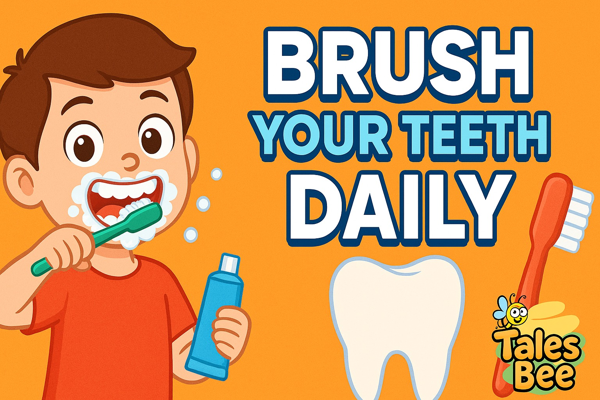

In [ ]:
from PIL import Image
image = Image.open('/content/image.jpg').resize((600,400))
image

In [ ]:
model2 = SentenceTransformer('clip-ViT-B-32')
print(model2)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


SentenceTransformer(
  (0): CLIPModel()
)


In [ ]:
embd = model2.encode(image)
print(embd.shape)
#print(embd)
print(len(embd))

(512,)
512


In [ ]:
text_embd = model2.encode("A photo of Kid brushing his teeth")
print(text_embd)

[-1.66924566e-01  1.00098982e-01 -2.45544434e-01  5.74961305e-01
  1.10614002e-02 -2.26272047e-01  2.24799633e-01 -7.07688630e-01
 -2.71805912e-01 -5.97674012e-01  1.89181104e-01 -1.11835822e-01
  1.56445444e-01  2.40159124e-01 -1.70692652e-02  2.06846714e-01
 -3.50267947e-01  1.18248448e-01  3.49659294e-01 -1.05607510e-03
  2.70835936e-01  1.97462842e-01  1.37540042e-01 -1.30213797e-03
 -2.41028652e-01  8.95787776e-03 -1.81537867e-01  3.75604004e-01
  2.89607257e-01 -5.13099074e-01  2.76707523e-02  3.95540476e-01
  3.80365431e-01  4.06698018e-01 -2.87677884e-01 -1.66914985e-01
 -1.55149519e-01  2.65728295e-01 -1.61367357e-01  5.22318631e-02
 -2.14488178e-01  3.70952845e-01  2.68229991e-01 -2.74800062e-01
 -1.88555732e-01  4.35146272e-01  1.57045051e-02  2.83847272e-01
  3.53036940e-01 -1.82062924e-01 -2.71186620e-01  2.28576109e-01
  3.29773843e-01 -3.68240803e-01  3.95458072e-01  1.12622917e-01
 -3.67313065e-03 -6.87402859e-02 -3.08247715e-01  1.69668838e-01
  8.11548114e-01 -3.25094

In [ ]:
###

###

In [ ]:
## Saving the Indexes

faiss.write_index(index,'faiss_text_index.index')

In [ ]:
## how to load the indexes

loaded_index = faiss.read_index('faiss_text_index.index')
print(loaded_index)

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7ac9ed9ee790> >


In [ ]:
query =   'The poor animals are taken by the police in Delhi'
## query should also be coverted into vector
query_vector = model.encode([query])


K = 1
distances, indices = loaded_index.search(query_vector,K)
print(distances)
print(indices)

[[1.3619602]]
[[2]]


In [ ]:
for i in indices[0]:
  print(documents[i])

The quick brown fox jumps over the lazy dog


In [ ]:
### Chroma Db
## Another Vector Database
## - Store high dimensional vectors
## - It is an open source vector Database
## - efficiently perform similarity search - ANN
## - Integrated with LLM based pipelines very easily


# Components -
# 1. Collections - Logicial Grouping of vectors and its metadata
# 2. Embeddings
# 3. Metadata - Extra info (e.g - tags, sources) attached to each vector
# 4. Similarity Search


# !pip install chromadb

In [ ]:
import chromadb
from chromadb.config import Settings

In [ ]:
client = chromadb.Client()

In [ ]:
collection = client.get_or_create_collection(name = 'documents')
print(collection)


Collection(name=documents)


In [ ]:
collection.add(documents= documents, ids= [str(i) for i in range(len(documents))], embeddings = embeddings.tolist())

In [ ]:
query = 'I love to play soccer'
query_embedding = model.encode([query]).tolist()
print(query_embedding)

[[0.007405731827020645, -0.001937267486937344, -0.010140737518668175, 0.015090586617588997, 0.039985962212085724, -0.0007902229554019868, 0.09143605083227158, 0.05325092002749443, 0.1363150179386139, 0.11031793057918549, -0.03382846713066101, -0.07400316745042801, -0.010281285271048546, 0.11219492554664612, 0.09580003470182419, -0.041756387799978256, -0.07458434253931046, -0.055522236973047256, -0.04293429106473923, -0.032519273459911346, -0.09953924268484116, 0.033015087246894836, 0.0016828373773023486, 0.005755551625043154, -0.0835675597190857, 0.030877646058797836, 0.039752282202243805, 0.016601966693997383, -0.06011119484901428, -0.0423755869269371, -0.05354004725813866, 0.05271731689572334, 0.018526192754507065, 0.06927692890167236, -0.017127683386206627, 0.04372580721974373, 0.08570541441440582, -0.07994832843542099, 0.03634817898273468, 0.0783652663230896, 0.007481982931494713, -0.022464770823717117, 0.04226600006222725, -0.003954259213060141, -0.03330123797059059, 0.07290638983

In [ ]:
results = collection.query(query_embeddings = query_embedding, n_results = 2)
print(results)

{'ids': [['3', '4']], 'embeddings': None, 'documents': [['I love playing football every weekend', 'Rugby is the game which is another football played in USA']], 'uris': None, 'included': ['metadatas', 'documents', 'distances'], 'data': None, 'metadatas': [[None, None]], 'distances': [[0.6721428632736206, 1.2892966270446777]]}
